In [14]:
import sklearn
import xgboost as xgb
import joblib
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [4]:
cancer=load_breast_cancer()

X_train, X_test, y_train, y_test=sklearn.model_selection.train_test_split(cancer.data, 
                                                                         cancer.target, 
                                                                         random_state=0)
xg_clas=xgb.XGBClassifier(random_state=1, n_estimators=100).fit(X_train, y_train)
print(xg_clas.score(X_train, y_train),"\n", xg_clas.score(X_test, y_test))

1.0 
 0.9790209790209791


In [33]:
dump_list=xg_clas.get_booster().get_dump()
num_t=len(dump_list)
print("Number of Trees=",num_t)

print(dump_list[0]) #I want to make predictions for unique trees, dump_list[0], dump_list[1]... etc.
                    #but I can't convert them to objects.




#print(xg_clas.predict(cancer.data, ntree_limit=2))
#xgb = joblib.load(filename)
#a=Booster.predict(data=cancer.data)
#print(a.attributes())

Number of Trees= 100
0:[f7<0.0489199981] yes=1,no=2,missing=1
	1:[f20<16.8250008] yes=3,no=4,missing=3
		3:[f10<0.591250002] yes=7,no=8,missing=7
			7:leaf=0.191869915
			8:leaf=-0
		4:[f1<18.9599991] yes=9,no=10,missing=9
			9:leaf=0.120000005
			10:leaf=-0.13333334
	2:[f23<785.799988] yes=5,no=6,missing=5
		5:[f21<23.7399998] yes=11,no=12,missing=11
			11:leaf=0.155555561
			12:leaf=-0.100000001
		6:[f1<14.3000002] yes=13,no=14,missing=13
			13:leaf=-0
			14:leaf=-0.191176474



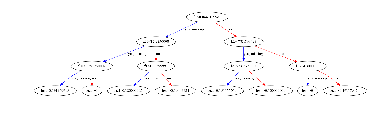

In [30]:
xgb.plot_tree(xg_clas, num_trees=0)
plt.rcParams['figure.figsize']=[500, 100]
plt.show()